In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape
# rows = 1460, cols = 81

(1460, 81)

In [7]:
df1 = df.copy()

In [8]:
df['Id'].nunique()

1460

In [9]:
df.drop('Id',axis=1,inplace=True)
df.shape

(1460, 80)

In [10]:
nv = df.isnull().sum()
nv[nv>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
df.drop(['PoolQC','Alley','MiscFeature'],axis=1,inplace=True)
nv = df.isnull().sum()
nv[nv>0]

LotFrontage      259
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [12]:
cat_nan = [i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtypes=='object']
num_nan = [i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtypes!='object']
print(cat_nan)
print(len(cat_nan))
print(num_nan)
print(len(num_nan))

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']
13
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
3


#### Basement null value Handling

In [13]:
bs_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for i in bs_cols:
    df[i].fillna('No_Base',inplace=True)
nv = df.isnull().sum()
nv[nv>0]

LotFrontage      259
MasVnrType         8
MasVnrArea         8
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [14]:
gar_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for i in gar_cols:
    df[i].fillna('No_Garage',inplace=True)
nv = df.isnull().sum()
nv[nv>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
Electrical        1
FireplaceQu     690
GarageYrBlt      81
Fence          1179
dtype: int64

In [15]:
for i in ['LotFrontage','MasVnrArea']:
    df[i].fillna(df[i].mean(),inplace=True)
nv = df.isnull().sum()
nv[nv>0]

MasVnrType        8
Electrical        1
FireplaceQu     690
GarageYrBlt      81
Fence          1179
dtype: int64

In [16]:
nv = df.isnull().sum()
nv[nv>0]

MasVnrType        8
Electrical        1
FireplaceQu     690
GarageYrBlt      81
Fence          1179
dtype: int64

In [17]:
for i in nv[nv>0].index:
    print(df[i].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


In [152]:
nv[nv>0].index

Index(['MasVnrType', 'Electrical', 'FireplaceQu', 'GarageYrBlt', 'Fence'], dtype='object')

In [18]:
for i in ['MasVnrType', 'Electrical', 'FireplaceQu', 'Fence']:
    x = df[i].mode().max()
    df[i].fillna(x,inplace=True)

In [19]:
nv = df.isnull().sum()
nv[nv>0]

GarageYrBlt    81
dtype: int64

In [20]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [21]:
df['GarageYrBlt'].fillna(2005.0,inplace=True)
nv = df.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

In [22]:
df.shape

(1460, 77)

### Correlation

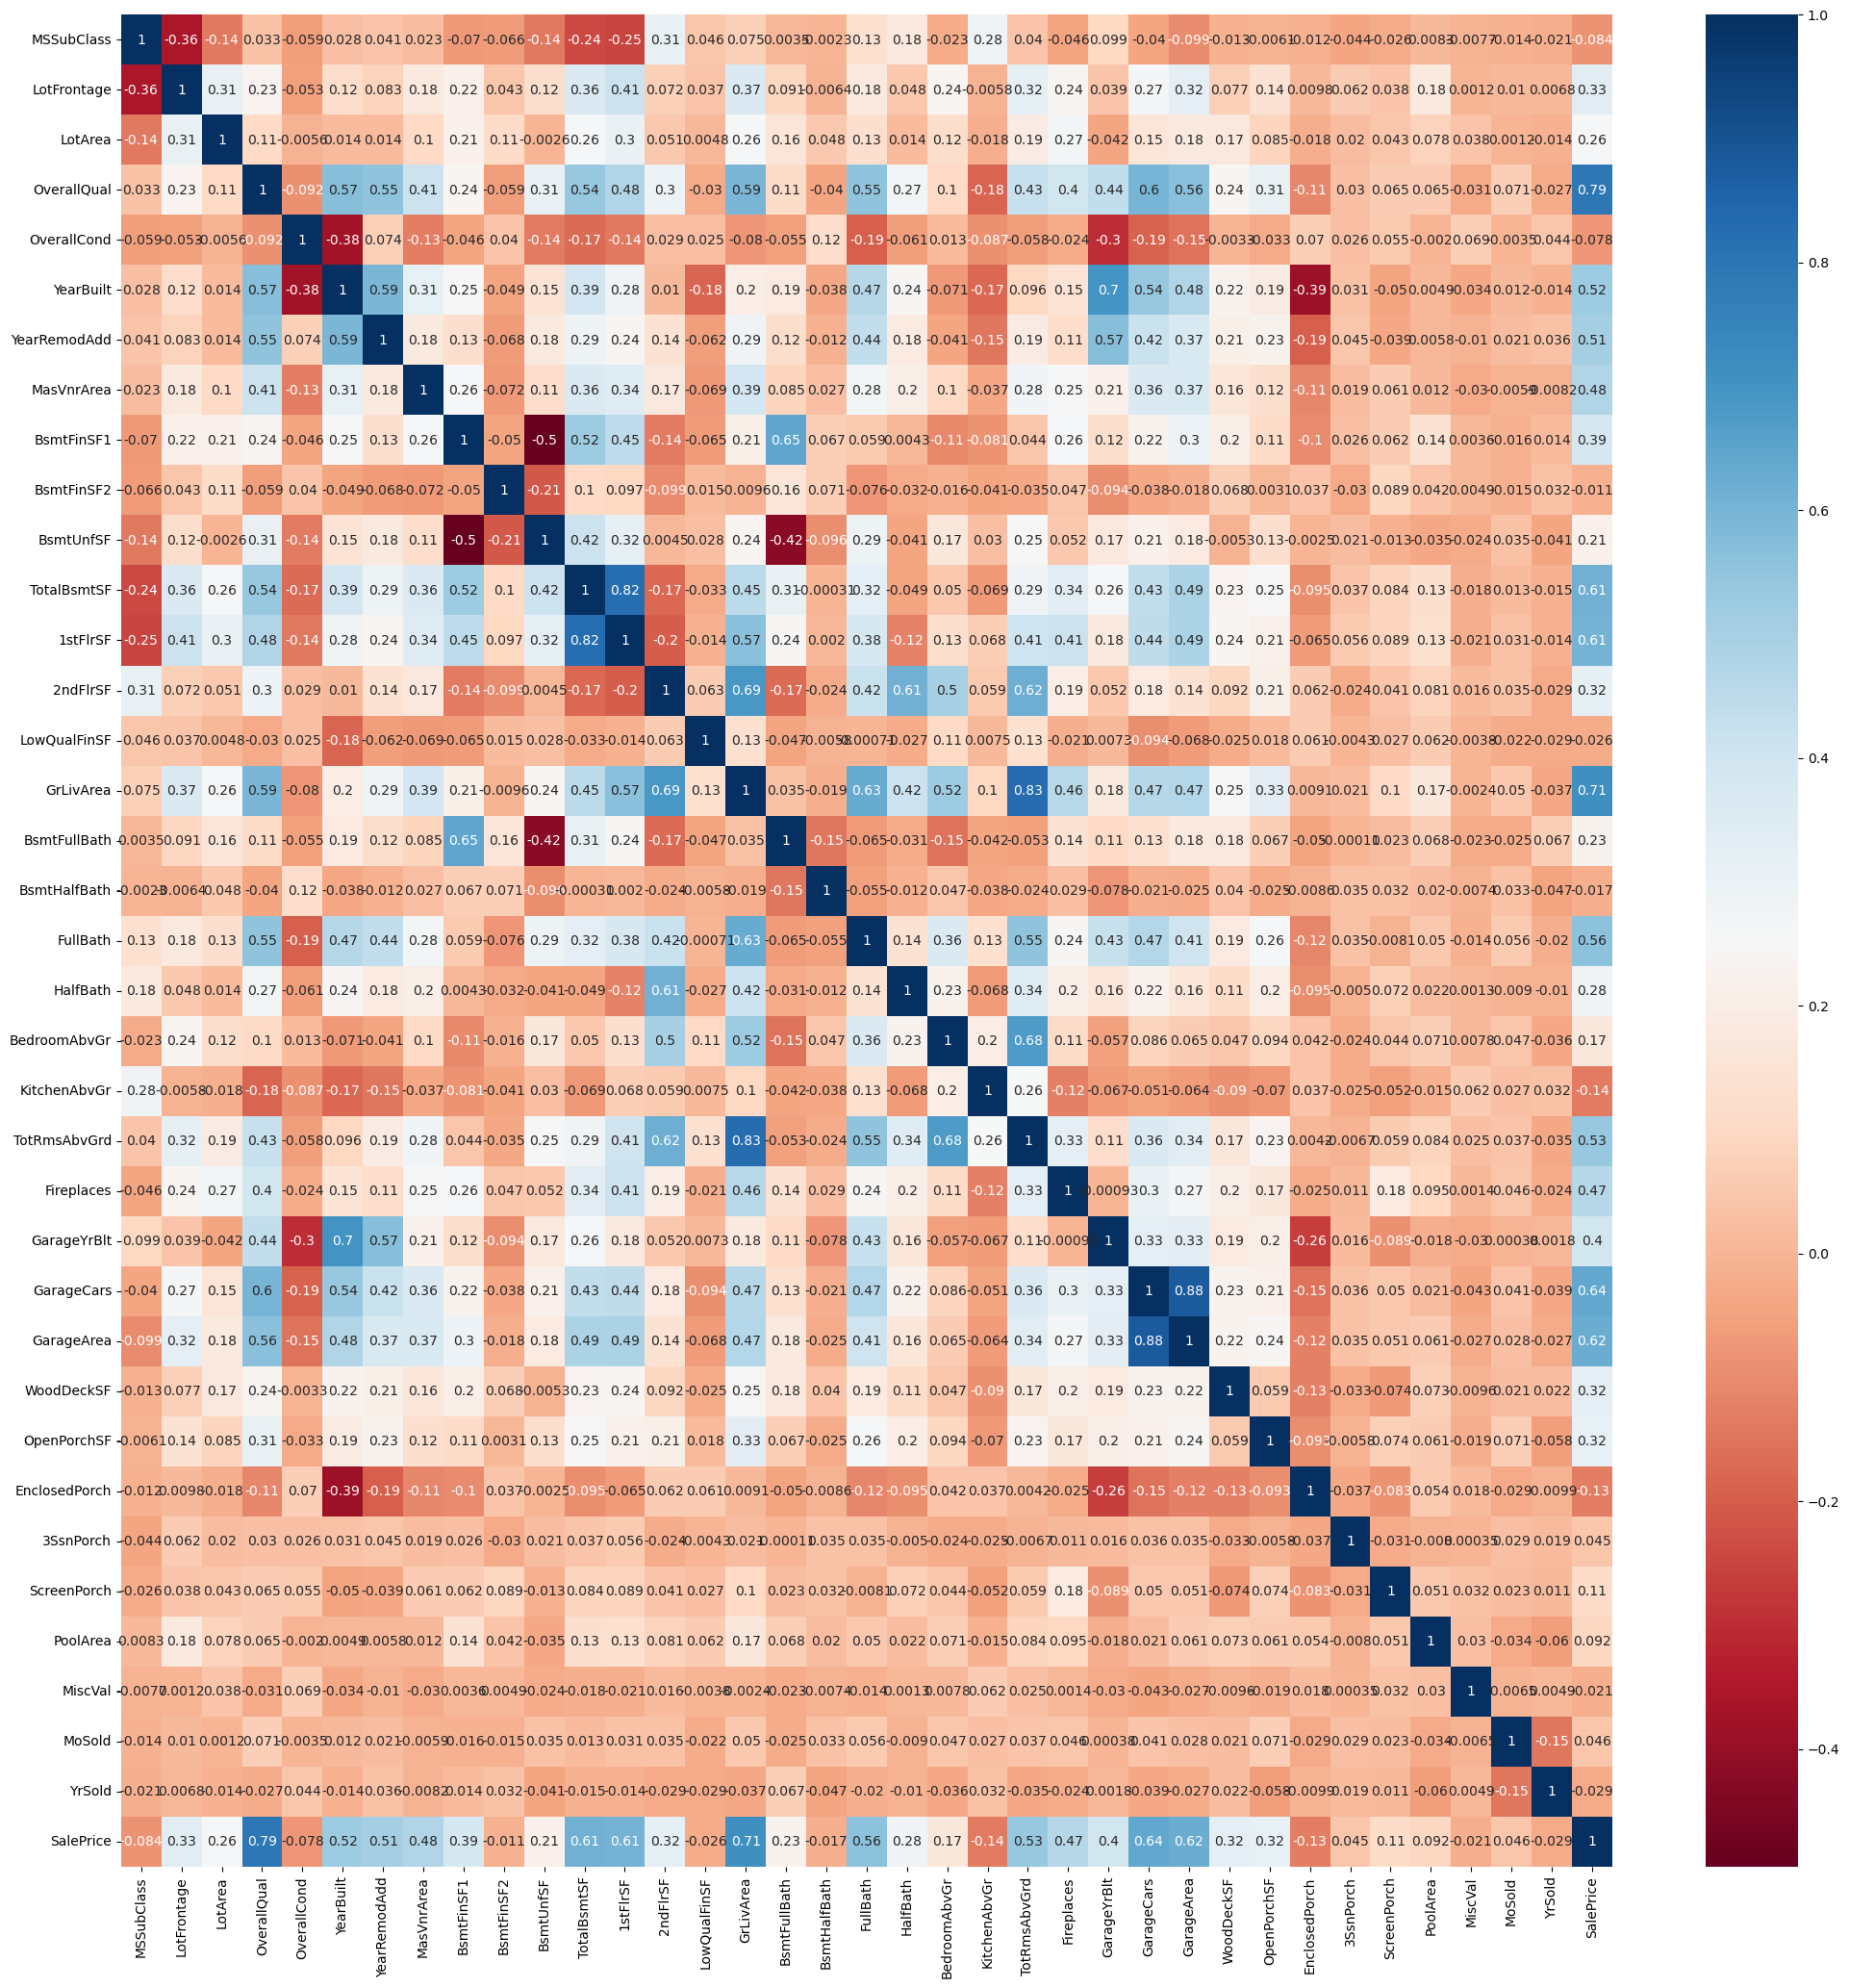

In [23]:
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

<AxesSubplot:>

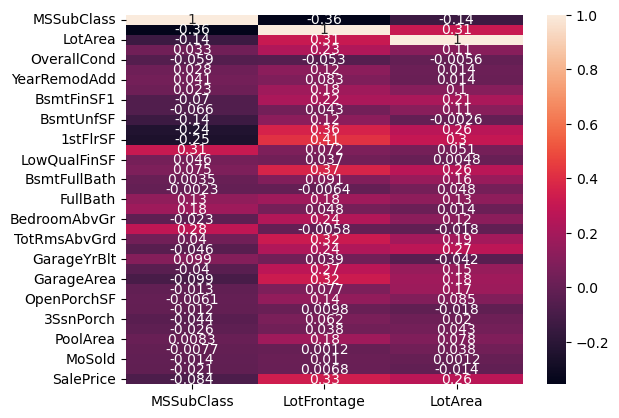

In [27]:
sns.heatmap(corr[['MSSubClass', 'LotFrontage', 'LotArea']],annot=True)

### Outlier Handling

In [28]:
df.describe(percentiles=[0.97,0.98,0.99]).T

,count,mean,std,min,50%,97%,98%,99%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,50.000000,160.00,188.20,190.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,70.049958,114.00,120.82,137.41,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,9478.500000,21571.80,25251.62,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,6.000000,9.00,9.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.000000,8.00,8.00,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1973.000000,2007.00,2008.00,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1994.000000,2008.00,2008.00,2009.00,2010.0
MasVnrArea,1460.0,103.685262,180.569112,0.0,0.000000,573.69,650.82,791.28,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,383.500000,1375.99,1442.64,1572.41,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.000000,546.23,658.12,830.38,1474.0


In [29]:
df.describe(percentiles=[0.97,0.98,0.99]).T.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [30]:
out_cols_98 = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
               'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
              'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
              'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
               'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
               'SalePrice']
print(out_cols_98)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [32]:
def oh1(x):
    x = x.clip(upper=x.quantile(0.98))
    return x

In [33]:
df[out_cols_98] = df[out_cols_98].apply(oh1)

In [34]:
df.describe(percentiles=[0.01,0.02,0.03,0.05]).T

,count,mean,std,min,1%,2%,3%,5%,50%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,20.00,20.00,20.00,50.000000,190.00
LotFrontage,1460.0,69.405164,18.845067,21.0,21.00,24.00,30.00,35.95,70.049958,120.82
LotArea,1460.0,9884.318219,4269.103743,1300.0,1680.00,2124.74,2522.00,3311.70,9478.500000,25251.62
OverallQual,1460.0,6.099315,1.382997,1.0,3.00,4.00,4.00,4.00,6.000000,10.00
OverallCond,1460.0,5.575342,1.112799,1.0,3.00,3.00,4.00,4.00,5.000000,9.00
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1899.18,1908.36,1910.00,1916.00,1973.000000,2010.00
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1950.00,1950.00,1950.00,1950.00,1994.000000,2010.00
MasVnrArea,1460.0,99.054851,159.552455,0.0,0.00,0.00,0.00,0.00,0.000000,650.82
BsmtFinSF1,1460.0,436.678219,424.424497,0.0,0.00,0.00,0.00,0.00,383.500000,1442.64
BsmtFinSF2,1460.0,41.938082,136.258146,0.0,0.00,0.00,0.00,0.00,0.000000,658.12


In [35]:
out_cols_01 = ['LotArea', 'OverallQual', 'OverallCond','1stFlrSF','TotRmsAbvGrd',
                'GrLivArea','SalePrice']
print(out_cols_01)

['LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'TotRmsAbvGrd', 'GrLivArea', 'SalePrice']


In [36]:
def oh2(x):
    x = x.clip(lower=x.quantile(0.01))
    return x

In [37]:
df[out_cols_01] = df[out_cols_01].apply(oh2)

In [38]:
df.shape

(1460, 77)

In [39]:
df2 = df.copy()
df2.shape

(1460, 77)

In [40]:
df.to_csv('hprice_after_preprocess.csv')

In [42]:
cat_cols = [i for i in df.columns if df[i].dtypes=='object']
print(len(cat_cols))

40


In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [45]:
def gen_matrix(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_score',r2s)

### Encoding categocrical columns

In [46]:
df.dtypes.value_counts()

object     40
float64    31
int64       6
dtype: int64

In [47]:
cat_cols = [i for i in df.columns if df[i].dtypes=='object']
print(len(cat_cols))
print(cat_cols)

40
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [48]:
df_dum = pd.get_dummies(data=df,columns=cat_cols,drop_first=True)
df_dum.shape

(1460, 249)

In [49]:
x = df_dum.drop('SalePrice',axis=1)
y = df_dum['SalePrice']
print(x.shape)
print(y.shape)

(1460, 248)
(1460,)


In [50]:
df_dum.dtypes.value_counts()

uint8      212
float64     31
int64        6
dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 248)
(365, 248)
(1095,)
(365,)


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)
print('Training_score',lr1.score(x_train,y_train))
print('Testing_score',lr1.score(x_test,y_test))
# overfit model

Training_score 0.9440949141952624
Testing_score 0.8666049540343763


In [133]:
ypred_lr1 = lr1.predict(x_test)

In [134]:
gen_matrix(y_test,ypred_lr1)

MAE 16044.27905307244
MSE 705587884.2686598
RMSE 26562.904289039252
R2_score 0.8666049540343763


### PCA

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [56]:
sc = StandardScaler()
sc.fit(x_train)
x_train_sc = sc.transform(x_train) 
x_test_sc = sc.transform(x_test) 

In [ ]:
# x_train_sc = sc.fit_transform(x_train)
# x_test_sc = sc.transform(x_test) 

In [58]:
pca1 = PCA()
pca1.fit(x_train_sc)

x_train_pc = pca1.transform(x_train_sc)
x_test_pc = pca1.transform(x_test_sc)
print(x_train_pc.shape)
print(x_test_pc.shape)

(1095, 248)
(365, 248)


### Scree Plot

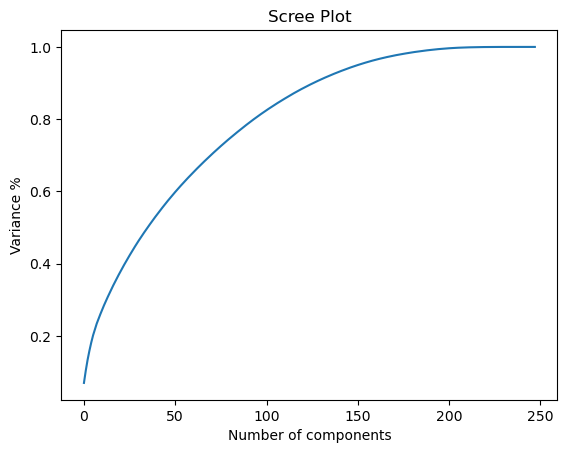

In [59]:
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance %')
plt.title('Scree Plot')
plt.show()

In [82]:
eig_val1 = pd.DataFrame({'Var':pca1.explained_variance_})
eig_val1.head()

,Var
0,16.842442
1,8.233076
2,7.210762
3,6.095990
4,5.444985


In [83]:
evr = pd.DataFrame({'EVR':pca1.explained_variance_ratio_*100})
evr.head()

,EVR
0,6.982183
1,3.413094
2,2.989285
3,2.527146
4,2.257266


In [84]:
eig_val1['EVR'] = eig_val1['Var']*100/eig_val1['Var'].sum()
eig_val1.head()

,Var,EVR
0,16.842442,6.982183
1,8.233076,3.413094
2,7.210762,2.989285
3,6.095990,2.527146
4,5.444985,2.257266


In [85]:
eig_val1['EVR_CumSum'] = eig_val1['EVR'].cumsum()
eig_val1.tail()

,Var,EVR,EVR_CumSum
243,6.558206e-32,2.718762e-32,100.0
244,6.558206e-32,2.718762e-32,100.0
245,3.542845e-32,1.468718e-32,100.0
246,2.866692e-32,1.188412e-32,100.0
247,2.825740e-32,1.171435e-32,100.0


In [86]:
eig_val1[eig_val1['EVR_CumSum']<76].tail()

,Var,EVR,EVR_CumSum
78,1.060402,0.439599,73.887567
79,1.037513,0.430110,74.317677
80,1.029926,0.426965,74.744642
81,1.018932,0.422407,75.167050
82,1.017764,0.421923,75.588973


#### Inference
1) Selecting 82 features out of 248 components generated.

In [87]:
train_res_df = pd.DataFrame(x_train_pc)
train_res_df.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,-3.794985,2.170652,-0.316668,-2.313031,-1.569765,0.063089,0.959756,-0.835108,-1.339904,1.064815,...,-5.168675e-16,1.937620e-15,5.469159e-16,7.724992e-16,-1.227696e-15,1.909427e-16,4.519472e-16,-3.826750e-16,-6.258823e-16,-4.922238e-16
1,0.027290,-4.747299,2.175199,-1.284838,0.128523,-1.406558,-1.593457,0.153375,-2.259241,-1.449540,...,1.205392e-15,1.338649e-16,-4.878730e-16,-4.126679e-16,1.651766e-15,-2.211328e-15,-1.536866e-16,-8.135080e-16,-6.401061e-17,-9.035686e-16
2,4.849487,-0.315684,-1.296206,0.201161,-1.186466,1.125226,0.364459,-0.323944,0.791429,-0.319743,...,5.831496e-16,5.762201e-16,-8.734655e-16,8.783828e-16,-1.616897e-15,1.400993e-15,2.017988e-15,-2.928639e-16,6.351615e-16,-4.300263e-16
3,2.741037,-3.714069,0.883635,0.111562,0.607957,0.811835,-1.907017,-2.166624,0.083167,-0.269027,...,-6.470702e-16,9.824694e-16,-5.356846e-16,-2.458653e-16,-1.671338e-15,-4.505006e-16,5.902083e-16,-1.171555e-16,4.109233e-16,-9.194051e-17
4,1.770196,-2.793875,-0.493906,-0.693091,-0.233543,1.196385,-3.244220,-0.076926,-0.227537,-0.587864,...,-4.683323e-16,1.271930e-15,9.513793e-16,-3.686158e-16,3.429452e-16,1.223310e-16,7.436028e-16,4.438161e-17,-5.136495e-17,-1.525511e-16


In [88]:
pc_train1 = train_res_df.iloc[:,:82]
print(pc_train1.shape)
pc_train1.head()

(1095, 82)


,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,-3.794985,2.170652,-0.316668,-2.313031,-1.569765,0.063089,0.959756,-0.835108,-1.339904,1.064815,...,1.092964,-0.640018,0.204048,-0.333300,-0.242126,0.324349,-0.213638,-1.160955,0.634371,-0.514421
1,0.027290,-4.747299,2.175199,-1.284838,0.128523,-1.406558,-1.593457,0.153375,-2.259241,-1.449540,...,-0.248282,1.693132,0.580055,-1.703538,1.945052,0.745022,-1.483465,1.165785,1.260548,0.382509
2,4.849487,-0.315684,-1.296206,0.201161,-1.186466,1.125226,0.364459,-0.323944,0.791429,-0.319743,...,0.393798,-1.419234,-1.101948,1.268593,0.206534,-0.735408,0.797896,1.173612,-0.892728,-0.454488
3,2.741037,-3.714069,0.883635,0.111562,0.607957,0.811835,-1.907017,-2.166624,0.083167,-0.269027,...,0.879275,1.468754,-0.067557,0.393941,1.391995,-0.484337,2.214645,0.648793,-0.174641,0.530192
4,1.770196,-2.793875,-0.493906,-0.693091,-0.233543,1.196385,-3.244220,-0.076926,-0.227537,-0.587864,...,-0.759986,0.474929,0.734707,0.536052,0.145606,-0.451921,-0.134954,0.675075,-1.040019,-0.020604


In [89]:
test_res_df = pd.DataFrame(x_test_pc)
pc_test1 = test_res_df.iloc[:,:82]
print(pc_test1.shape)
pc_test1.head()

(365, 82)


,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1.789883,-3.370280,0.224956,-2.472164,-0.331835,-0.347432,-1.748492,-0.138870,-0.335543,-0.293993,...,-0.295845,0.321071,1.356484,0.062844,-0.910729,0.457926,-0.264195,1.098784,-0.814013,-0.036371
1,-5.710972,-0.977819,1.320054,2.498814,1.142231,-3.372889,-0.736953,0.568986,-3.794254,-0.474302,...,0.213656,0.033965,-0.618026,-0.956656,0.001054,-0.181502,-0.725829,-0.492631,-0.991298,0.674537
2,5.199783,-0.484680,-2.806867,0.348188,-1.423453,2.475513,-0.006658,-0.595995,0.138866,1.275046,...,-0.397046,-0.768668,-0.420976,-0.405599,-0.357970,1.163582,-0.029183,0.096685,0.296126,0.026651
3,3.352651,-0.468119,-2.531611,1.368208,-0.546831,0.556421,0.392550,3.000778,0.401369,-2.240153,...,0.510287,-0.624650,-0.114753,-0.753549,-0.139333,-0.488840,0.366077,-0.185837,-0.099099,-0.437129
4,-5.791054,-0.527801,2.213217,-1.227625,2.180537,3.023702,2.028318,0.056229,-1.928473,0.181705,...,0.072498,1.917177,0.314335,-0.426687,-0.420978,0.480130,0.462026,-0.889879,-0.665894,-0.108908


In [91]:
print(pc_train1.shape)
print(pc_test1.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 82)
(365, 82)
(1095,)
(365,)


### Lin Reg after PCA

In [92]:
lr2 = LinearRegression()
lr2.fit(pc_train1,y_train)
print('Training_score',lr2.score(pc_train1,y_train))
print('Testing_score',lr2.score(pc_test1,y_test))

Training_score 0.8839267945932392
Testing_score 0.880902984239319


#### Inference
Overfitting has been reduced

In [93]:
ypred_lr2 = lr2.predict(pc_test1)

In [94]:
gen_matrix(y_test,ypred_lr2)

MAE 18746.142848405223
MSE 629959012.0831462
RMSE 25098.984283893766
R2_score 0.880902984239319


In [135]:
gen_matrix(y_test,ypred_lr1)

MAE 16044.27905307244
MSE 705587884.2686598
RMSE 26562.904289039252
R2_score 0.8666049540343763


In [74]:
print(pc_train1.shape)
print(type(pc_train1))

(1095, 82)
<class 'pandas.core.frame.DataFrame'>


In [95]:
t = []
s = 'PC'                             # PC = Principal component
for i in range(pc_train1.shape[1]):  # x_reg.shape =(1095, 82)  # i=0,1,2,3,.....,81
    d = s + str(i)
    t.append(d)
print(t)

['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81']


In [96]:
pc_train1.columns = t
pc_train1.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81
0,-3.794985,2.170652,-0.316668,-2.313031,-1.569765,0.063089,0.959756,-0.835108,-1.339904,1.064815,...,1.092964,-0.640018,0.204048,-0.333300,-0.242126,0.324349,-0.213638,-1.160955,0.634371,-0.514421
1,0.027290,-4.747299,2.175199,-1.284838,0.128523,-1.406558,-1.593457,0.153375,-2.259241,-1.449540,...,-0.248282,1.693132,0.580055,-1.703538,1.945052,0.745022,-1.483465,1.165785,1.260548,0.382509
2,4.849487,-0.315684,-1.296206,0.201161,-1.186466,1.125226,0.364459,-0.323944,0.791429,-0.319743,...,0.393798,-1.419234,-1.101948,1.268593,0.206534,-0.735408,0.797896,1.173612,-0.892728,-0.454488
3,2.741037,-3.714069,0.883635,0.111562,0.607957,0.811835,-1.907017,-2.166624,0.083167,-0.269027,...,0.879275,1.468754,-0.067557,0.393941,1.391995,-0.484337,2.214645,0.648793,-0.174641,0.530192
4,1.770196,-2.793875,-0.493906,-0.693091,-0.233543,1.196385,-3.244220,-0.076926,-0.227537,-0.587864,...,-0.759986,0.474929,0.734707,0.536052,0.145606,-0.451921,-0.134954,0.675075,-1.040019,-0.020604


In [97]:
print(pc_test1.shape)
print(type(pc_test1))

(365, 82)
<class 'pandas.core.frame.DataFrame'>


In [78]:
t1 = []
s = 'PC'                         # PC = Principal component
for i in range(pc_test1.shape[1]):  # pc_test1.shape =(365, 80)  # i=0,1,2,3,.....,80
    d = s + str(i)
    t1.append(d)
print(t1)

['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81']


In [98]:
pc_test1.columns = t1
pc_test1.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81
0,1.789883,-3.370280,0.224956,-2.472164,-0.331835,-0.347432,-1.748492,-0.138870,-0.335543,-0.293993,...,-0.295845,0.321071,1.356484,0.062844,-0.910729,0.457926,-0.264195,1.098784,-0.814013,-0.036371
1,-5.710972,-0.977819,1.320054,2.498814,1.142231,-3.372889,-0.736953,0.568986,-3.794254,-0.474302,...,0.213656,0.033965,-0.618026,-0.956656,0.001054,-0.181502,-0.725829,-0.492631,-0.991298,0.674537
2,5.199783,-0.484680,-2.806867,0.348188,-1.423453,2.475513,-0.006658,-0.595995,0.138866,1.275046,...,-0.397046,-0.768668,-0.420976,-0.405599,-0.357970,1.163582,-0.029183,0.096685,0.296126,0.026651
3,3.352651,-0.468119,-2.531611,1.368208,-0.546831,0.556421,0.392550,3.000778,0.401369,-2.240153,...,0.510287,-0.624650,-0.114753,-0.753549,-0.139333,-0.488840,0.366077,-0.185837,-0.099099,-0.437129
4,-5.791054,-0.527801,2.213217,-1.227625,2.180537,3.023702,2.028318,0.056229,-1.928473,0.181705,...,0.072498,1.917177,0.314335,-0.426687,-0.420978,0.480130,0.462026,-0.889879,-0.665894,-0.108908


### Experimentation

### PCA - 2

In [99]:
# pca1 = PCA()
# pca1.fit(x_train_sc)

# x_train_pc = pca1.transform(x_train_sc)
# x_test_pc = pca1.transform(x_test_sc)
# print(x_train_pc.shape)
# print(x_test_pc.shape)

In [100]:
pca2 = PCA()
x_train_pc2 = pca2.fit_transform(x_train_sc)
x_test_pc2 = pca2.fit_transform(x_test_sc)

In [101]:
print(x_train_pc2.shape)
print(x_test_pc2.shape)

(1095, 248)
(365, 248)


In [102]:
eig_val2 = pd.DataFrame({'Var':pca2.explained_variance_,
                         'EVR':pca2.explained_variance_ratio_*100})

eig_val2.head()

,Var,EVR
0,18.113970,7.512953
1,10.916151,4.527585
2,9.114846,3.780475
3,8.192344,3.397858
4,7.308530,3.031287


In [103]:
eig_val2['EVR_CumSum'] = eig_val2['EVR'].cumsum()
eig_val2.tail()

,Var,EVR,EVR_CumSum
243,7.804826e-32,3.237131e-32,100.0
244,5.163107e-32,2.141451e-32,100.0
245,3.997408e-32,1.657966e-32,100.0
246,3.281746e-32,1.361138e-32,100.0
247,1.166453e-32,4.837980e-33,100.0


In [104]:
eig_val2[eig_val2['EVR_CumSum']<76].tail()

,Var,EVR,EVR_CumSum
45,1.515315,0.628492,73.085624
46,1.475271,0.611883,73.697507
47,1.442269,0.598196,74.295703
48,1.415917,0.587266,74.882969
49,1.384340,0.574169,75.457138


In [110]:
train_res_df2 = pd.DataFrame(x_train_pc2)
train_res_df2.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,-3.794985,2.170652,-0.316668,-2.313031,-1.569765,0.063089,0.959756,-0.835108,-1.339904,1.064815,...,-3.689417e-16,6.281627e-17,-5.643010e-16,2.833210e-16,4.454026e-16,-5.660497e-16,3.131773e-16,1.515746e-16,2.199273e-16,-8.406708e-17
1,0.027290,-4.747299,2.175199,-1.284838,0.128523,-1.406558,-1.593457,0.153375,-2.259241,-1.449540,...,5.418107e-17,4.528517e-16,4.541655e-16,-1.033393e-17,-4.400826e-17,1.049471e-16,4.637594e-17,-7.627635e-17,-1.470614e-16,1.081613e-16
2,4.849487,-0.315684,-1.296206,0.201161,-1.186466,1.125226,0.364459,-0.323944,0.791429,-0.319743,...,1.679106e-16,1.567710e-17,-3.033403e-16,-8.262012e-17,-6.843474e-17,4.541240e-16,-1.395417e-16,-2.935773e-16,1.637930e-17,3.014431e-17
3,2.741037,-3.714069,0.883635,0.111562,0.607957,0.811835,-1.907017,-2.166624,0.083167,-0.269027,...,1.874292e-16,4.797547e-16,-2.636457e-16,-1.123870e-17,-2.730990e-16,1.264598e-16,-6.912069e-16,-2.875704e-16,1.113205e-16,-2.667607e-16
4,1.770196,-2.793875,-0.493906,-0.693091,-0.233543,1.196385,-3.244220,-0.076926,-0.227537,-0.587864,...,-5.826598e-16,-1.797873e-16,-3.804621e-16,-2.556093e-16,8.701065e-17,-2.478420e-16,-2.431596e-16,-1.094073e-16,9.971188e-17,2.858442e-16


In [111]:
train_res_df2 = train_res_df2.iloc[:,:49]
print(train_res_df2.shape)

(1095, 49)


In [112]:
test_res_df2 = pd.DataFrame(x_test_pc2)
test_res_df2.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,1.389376,-1.765730,0.530046,-2.795625,0.724077,0.153790,1.096418,-0.225872,0.373930,-1.532074,...,9.447190e-17,5.193415e-17,1.166801e-16,7.839099e-17,2.125812e-16,8.081926e-16,2.109431e-16,-2.101454e-16,-1.154589e-16,-1.394970e-16
1,-6.234694,0.700592,0.906364,-1.148735,0.987372,-0.740283,-2.558359,-3.082426,-2.542042,-0.447029,...,-6.914590e-17,3.594822e-16,-2.820166e-16,5.370706e-16,-1.947031e-16,-1.063636e-16,3.950848e-16,-7.123503e-17,2.685338e-16,7.993029e-17
2,4.886903,-0.880523,-0.402885,-1.128503,-3.346535,0.815845,0.658253,1.147052,0.961680,-0.288586,...,1.143716e-16,8.024399e-16,-1.172096e-16,3.817157e-16,3.053011e-16,-1.817167e-16,-2.434662e-16,-2.267103e-16,3.264911e-16,-1.904111e-17
3,2.771828,-0.570138,-1.310147,-0.942646,-2.307447,-1.975225,-0.128682,0.680721,-0.448619,2.128151,...,3.504351e-17,-6.768718e-17,-1.082310e-16,-4.322334e-17,1.742788e-16,2.166116e-16,-1.775143e-16,1.220476e-16,5.902592e-18,3.558239e-17
4,-6.251344,0.953038,1.578082,-0.736522,2.315205,1.275713,-0.307773,3.477119,1.133471,0.134197,...,-2.735756e-16,-1.557556e-17,2.774616e-16,-1.802644e-16,-3.090169e-16,2.874100e-16,-5.142079e-16,1.247569e-16,2.400458e-16,1.201849e-16


In [113]:
test_res_df2 = test_res_df2.iloc[:,:49]
print(test_res_df2.shape)

(365, 49)


In [114]:
lr4 = LinearRegression()
lr4.fit(train_res_df2,y_train)
print('Training_score',lr4.score(train_res_df2,y_train))
print('Testing_score',lr4.score(test_res_df2,y_test))

Training_score 0.8662559594642635
Testing_score 0.4561265588021943


In [115]:
#### 
print(x.shape)
print(y.shape)

(1460, 248)
(1460,)


In [116]:
r1 = pd.DataFrame(x_train_sc,columns=x_train.columns)
r1.shape

(1095, 248)

In [117]:
r2 = pd.DataFrame(x_test_sc,columns=x_test.columns)
r2.shape

(365, 248)

In [118]:
res = r1.append(r2)
res.shape

C:\Users\Dell\AppData\Local\Temp\ipykernel_17136\2172158846.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = r1.append(r2)


(1460, 248)

In [120]:
res.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.475911,-1.398870,-1.577687,0.640077,-0.528073,1.107889,1.020374,-0.543221,-1.010135,-0.301659,...,-0.052414,-0.06055,-0.297438,-0.030234,0.382880,-0.06055,-0.067729,-0.125578,0.453814,-0.299253
1,-0.871228,0.443074,0.037501,-0.099252,0.391227,0.094543,0.682585,-0.010360,0.528792,2.554812,...,-0.052414,-0.06055,-0.297438,-0.030234,0.382880,-0.06055,-0.067729,-0.125578,0.453814,-0.299253
2,-0.167086,-0.504211,-0.213204,-0.099252,-0.528073,-1.049557,-1.681937,-0.630986,-0.562966,-0.301659,...,-0.052414,-0.06055,-0.297438,-0.030234,0.382880,-0.06055,-0.067729,-0.125578,0.453814,-0.299253
3,-0.871228,0.024688,0.548660,-0.838581,-0.528073,-0.363097,-0.330782,-0.630986,-1.048192,-0.301659,...,-0.052414,-0.06055,-0.297438,-0.030234,0.382880,-0.06055,-0.067729,-0.125578,0.453814,-0.299253
4,-0.871228,0.285194,-0.053031,-0.099252,0.391227,-0.428474,-1.295893,0.892370,0.397971,-0.301659,...,-0.052414,-0.06055,-0.297438,-0.030234,-2.611786,-0.06055,-0.067729,-0.125578,0.453814,-0.299253


In [121]:
pca4 = PCA()
pca_res = pca4.fit_transform(res)
pca_res.shape
# (1460, 248)

(1460, 248)

In [122]:
eig_val4 = pd.DataFrame({'Var':pca4.explained_variance_,
                         'EVR':pca4.explained_variance_ratio_*100})

eig_val4.head()

,Var,EVR
0,16.917980,7.014452
1,8.158891,3.382800
2,7.336942,3.042008
3,5.951105,2.467419
4,5.635654,2.336628


In [123]:
eig_val4['EVR_CumSum'] = eig_val4['EVR'].cumsum()
eig_val4.tail()

,Var,EVR,EVR_CumSum
243,5.945593e-32,2.465134e-32,100.0
244,5.945593e-32,2.465134e-32,100.0
245,5.945593e-32,2.465134e-32,100.0
246,5.945593e-32,2.465134e-32,100.0
247,1.483439e-32,6.150562e-33,100.0


In [124]:
eig_val4[eig_val4['EVR_CumSum']<76].tail()

,Var,EVR,EVR_CumSum
79,1.013979,0.420411,74.114985
80,0.992701,0.411589,74.526574
81,0.982913,0.407530,74.934105
82,0.980309,0.406451,75.340556
83,0.972161,0.403073,75.743629


In [125]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(pca_res,y,test_size=0.25,random_state=42)
print(x_train4.shape)
print(x_test4.shape)
print(y_train4.shape)
print(y_test4.shape)

(1095, 248)
(365, 248)
(1095,)
(365,)


In [126]:
train_res_df4 = pd.DataFrame(x_train4)
train_res_df4.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,-6.363639,3.005834,0.805583,3.204785,2.118490,1.479414,-1.941281,-3.569071,1.194299,1.706291,...,0.000424,4.376600e-16,-1.848932e-16,5.917219e-17,-1.454085e-16,2.943787e-17,-3.590120e-18,1.473947e-16,-8.807089e-17,-4.367812e-18
1,-5.978176,3.184311,-0.073270,-0.761918,-0.293996,4.402027,-2.157081,-1.831557,-0.332256,3.269954,...,0.006024,2.974707e-16,-1.239692e-16,9.845223e-18,2.058525e-16,-3.499927e-16,1.077980e-16,1.624532e-16,3.149026e-17,-6.757143e-17
2,-2.807946,1.651027,-0.159320,-0.111240,-1.225246,-1.881102,0.676648,1.600115,-1.299157,-1.234205,...,0.000694,-3.035847e-16,-1.610737e-16,9.555818e-17,4.504814e-17,4.189383e-17,5.389495e-18,-1.348339e-17,-1.410379e-17,-3.163806e-17
3,1.968771,-0.601269,-0.850916,-2.268567,-2.864685,-0.509859,1.459398,1.020967,-1.105544,0.591692,...,0.000758,-8.819886e-17,7.163403e-19,8.345419e-18,1.618165e-16,9.737299e-18,2.768865e-17,4.087605e-17,-8.869773e-17,-1.684025e-17
4,3.010465,-3.290143,-0.284707,-0.960851,-1.403770,1.039503,-0.258575,0.587624,-1.601329,-0.248235,...,0.000998,-7.183366e-16,3.573035e-17,1.173660e-16,-3.021794e-18,-9.659736e-17,-1.451102e-17,-5.851130e-17,4.472208e-17,3.195198e-17


In [127]:
train_res_df4 = train_res_df4.iloc[:,:82]
print(train_res_df4.shape)

(1095, 82)


In [128]:
test_res_df4 = pd.DataFrame(x_test4)
test_res_df4.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,3.282073,2.147172,-1.036221,3.377697,2.311009,0.110133,-0.454707,-0.522509,-1.854067,-0.985511,...,-0.004306,-7.705896e-16,-3.117267e-16,2.105735e-16,2.162960e-16,2.165762e-17,2.108015e-16,-1.904404e-16,1.545447e-16,1.565440e-17
1,3.737137,-0.168164,-2.250463,2.565902,-0.497391,0.480476,-1.171729,0.145973,-1.385469,-0.417677,...,-0.007812,8.338212e-17,-8.703852e-18,4.673424e-17,3.956405e-17,-5.552468e-18,-6.574405e-17,-9.858909e-17,-1.205739e-16,7.280051e-17
2,3.889511,0.054057,-1.382413,0.361617,0.896168,-0.707830,2.038684,-0.609790,0.529000,1.153520,...,0.000418,-1.044562e-15,-3.412076e-17,1.385738e-16,1.787553e-16,-2.752738e-17,4.698125e-17,-8.623265e-17,-1.295531e-16,9.925781e-17
3,2.337673,-3.302663,-0.359977,-0.824618,0.345840,1.229791,1.059954,-1.732098,1.711527,-1.484635,...,0.006196,-2.146611e-16,-8.653953e-17,1.310004e-16,2.529704e-17,3.519878e-17,4.020381e-17,-1.895300e-16,-6.329230e-18,-1.739708e-18
4,-3.336373,4.050250,-0.933558,1.295275,-1.111653,-0.098729,-2.203819,-0.122613,-1.200832,3.839337,...,-0.005947,1.005314e-16,-2.650945e-18,-3.710245e-17,8.263592e-17,4.943652e-17,1.187688e-16,-1.278879e-16,-1.109778e-17,9.709283e-17


In [129]:
test_res_df4 = test_res_df4.iloc[:,:82]
print(test_res_df4.shape)

(365, 82)


In [131]:
lr5 = LinearRegression()
lr5.fit(train_res_df4,y_train4)
print('Training_score',lr5.score(train_res_df4,y_train4))
print('Testing_score',lr5.score(test_res_df4,y_test4))

Training_score 0.06710278869290975
Testing_score -0.06450610617262487
